In [2]:
import os
import numpy as np
import pickle as pcl

# %matplotlib inline
# import matplotlib.pyplot as plt
# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('text', usetex=False)

from predict import predict

Using TensorFlow backend.


In [3]:
si = predict(fname='data/full_histories_illustris.h5')
si.training_mask()
si.filename

'data/full_histories_illustris.h5'

In [4]:
se = predict(fname='data/full_histories_eagle.h5')
se.training_mask()

### Intrinsic (no noise)

In [5]:
si.generate_standardisation('Intrinsic')
features = si.prepare_features(key='Intrinsic', CNN=True)
predictors = si.load_arr('log_8','SFH')

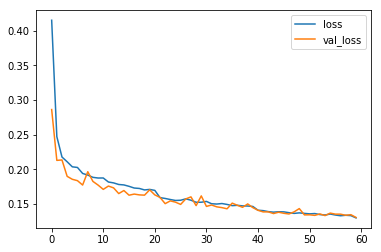

Epoch 61/1000
  20/4148 [..............................] - ETA: 16s - loss: 0.1479 - mean_absolute_error: 0.7814 - mean_squared_error: 2.8457 - acc: 0.6500

KeyboardInterrupt: 

In [7]:
model,scores = si.create_cnn_model(features, predictors, batch_size=20, train=si.train)

In [ ]:
prediction = model.predict(features[~si.train])
np.mean([si._SMAPE(predictors[~si.train][i], prediction[i]) \
                     * 100 for i in range(len(prediction))])

In [ ]:
f = 'data/cnn_trained_illustris_intrinsic.h5'
if os.path.isfile(f): os.remove(f)
model.save(f)

### Dust (no noise)

In [ ]:
si.generate_standardisation('Dust')
features = si.prepare_features(key='Dust', CNN=True)

In [ ]:
model,scores = si.create_cnn_model(features, predictors, batch_size=20, train=si.train)

In [ ]:
f = 'data/cnn_trained_dust.h5'
if os.path.isfile(f): os.remove(f)
model.save(f)

EAGLE dust (no noise)

In [ ]:
se.generate_standardisation('Dust')
features = se.prepare_features(key='Dust', CNN=True)
predictors = se.load_arr('log_8','SFH')

In [ ]:
model,scores = si.create_cnn_model(features, predictors, batch_size=20, train=se.train)

In [ ]:
f = 'data/cnn_trained_eagle_dust.h5'
if os.path.isfile(f): os.remove(f)
model.save(f)

### Add noise

In [ ]:
sn = 50
predictors = si.load_arr('log_8','SFH')
illustris_dust, wl = si.load_spectra('Dust')
illustris_dust_noise = si.add_noise_flat(spec=illustris_dust, wl=wl, sn=sn)
si.generate_standardisation(key='Dust Noise SN50', spec=illustris_dust_noise)
features = si.prepare_features(illustris_dust_noise, key='Dust Noise SN50', CNN=True)

In [ ]:
model,scores = si.create_cnn_model(features, predictors, batch_size=20, train=si.train)

In [ ]:
f = 'data/cnn_trained_dust_noise50.h5'
if os.path.isfile(f): os.remove(f)
model.save(f)

### Noise resampled (dust)

In [ ]:
count = 0
train = si.train
while count < 3:    
    illustris_dust_noise = si.add_noise_flat(spec=illustris_dust, wl=wl, sn=sn)
        
    feat = si.prepare_features(illustris_dust_noise, key="Dust Noise SN50", CNN=True)
    features = np.vstack([features, feat])
    
    predictors = np.vstack([predictors, predictors[:len(feat)]])
    train = np.hstack([train, train[:len(feat)]])
    
    count += 1
    print(count)


In [ ]:
features.shape, predictors.shape, train.shape

In [ ]:
model,scores = si.create_cnn_model(features, predictors, batch_size=20, train=train)

In [ ]:
f = 'data/cnn_trained_dust_noise50_x4.h5'
if os.path.isfile(f): os.remove(f)
model.save(f)

## Noise EAGLE

In [ ]:
sn = 50
predictors = se.load_arr('log_8','SFH')
eagle_dust, wl = se.load_spectra('Dust')
eagle_dust_noise = se.add_noise_flat(spec=eagle_dust, wl=wl, sn=sn)
se.generate_standardisation(key='Dust Noise SN50', spec=eagle_dust_noise)
features = se.prepare_features(eagle_dust_noise, key='Dust Noise SN50', CNN=True)

In [ ]:
# model,scores = si.create_cnn_model(features, predictors, batch_size=20, train=si.train)

In [ ]:
# f = 'data/cnn_trained_dust_noise50.h5'
# if os.path.isfile(f): os.remove(f)
# model.save(f)

resampled

In [ ]:
count = 0
train = se.train
while count < 3:    
    eagle_dust_noise = se.add_noise_flat(spec=eagle_dust, wl=wl, sn=sn)
        
    feat = se.prepare_features(eagle_dust_noise, key="Dust Noise SN50", CNN=True)
    features = np.vstack([features, feat])
    
    predictors = np.vstack([predictors, predictors[:len(feat)]])
    train = np.hstack([train, train[:len(feat)]])
    
    count += 1
    print(count)


In [ ]:
features.shape, predictors.shape, train.shape

In [ ]:
model,scores = se.create_cnn_model(features, predictors, batch_size=20, train=train)

In [ ]:
f = 'data/cnn_trained_eagle_dust_noise50_x4.h5'
if os.path.isfile(f): os.remove(f)
model.save(f)

### Noise resampled (intrinsic)

In [ ]:
sn = 50
predictors = si.load_arr('log_8','SFH')
illustris_intr, wl = si.load_spectra('Intrinsic')
illustris_intr_noise = si.add_noise_flat(spec=illustris_intr, wl=wl, sn=sn)
si.generate_standardisation(key='Intrinsic Noise SN50', spec=illustris_intr_noise)
features = si.prepare_features(illustris_intr_noise, key='Intrinsic Noise SN50', CNN=True)

In [ ]:
count = 0
train = si.train
while count < 3:    
    illustris_intr_noise = si.add_noise_flat(spec=illustris_intr, wl=wl, sn=sn)
        
    feat = si.prepare_features(illustris_intr_noise, key="Intrinsic Noise SN50", CNN=True)
    features = np.vstack([features, feat])
    
    predictors = np.vstack([predictors, predictors[:len(feat)]])
    train = np.hstack([train, train[:len(feat)]])
    
    count += 1
    print(count)


In [ ]:
features.shape, predictors.shape, train.shape

In [ ]:
model,scores = si.create_cnn_model(features, predictors, batch_size=20, train=train)

In [ ]:
f = 'data/cnn_trained_intr_noise50_x4.h5'
if os.path.isfile(f): os.remove(f)
model.save(f)

### SN=20
Add noise

In [ ]:
sn=20
predictors = si.load_arr('log_8','SFH')
illustris_dust, wl = si.load_spectra('Dust')
illustris_dust_noise = si.add_noise_flat(spec=illustris_dust, wl=wl, sn=20)
si.generate_standardisation(spec=illustris_dust_noise, key='Dust Noise SN20')
features = si.prepare_features(illustris_dust_noise, key='Dust Noise SN20', CNN=True)

In [ ]:
model,scores = si.create_cnn_model(features, predictors, batch_size=20, train=si.train)

In [ ]:
f = 'data/cnn_trained_dust_noise20.h5'
if os.path.isfile(f): os.remove(f)
model.save(f)

Noise resampled

In [ ]:
count = 0
train = si.train
illustris_dust_noise = si.add_noise_flat(spec=illustris_dust, wl=wl, sn=20)
features=si.prepare_features(illustris_dust_noise, key="Dust Noise SN20", CNN=True)
predictors = si.load_arr('log_8','SFH')

while count < 3:
    illustris_dust_noise = si.add_noise_flat(spec=illustris_dust, wl=wl, sn=sn)
        
    feat = si.prepare_features(illustris_dust_noise, key="Dust Noise SN20", CNN=True)
    features = np.vstack([features, feat])
    
    predictors = np.vstack([predictors, predictors[:len(feat)]])
    train = np.hstack([train, train[:len(feat)]])
    
    count += 1
    print(count)


In [ ]:
model,scores = si.create_cnn_model(features, predictors, batch_size=20, train=train)

In [ ]:
f = 'data/cnn_trained_dust_noise20_x4.h5'
if os.path.isfile(f): os.remove(f)
model.save(f)